In [1]:
import os
import crested
import anndata
import numpy as np
import keras

In [2]:
hydrop_model_folder_path = "../../../../../../../data/hydrop/fly_embryo/paper_zips/10x_hydropv2_comparisons_models/hydrop_fly"
multiome_model_folder_path = "../../../../../../../data/hydrop/fly_embryo/paper_zips/10x_hydropv2_comparisons_models/10x_fly"
hydrop_adata_path = "../../../../../../../data/hydrop/fly_embryo/paper_zips/10x_hydropv2_comparisons_data/anndatas/hydrop_fly_kfolds.h5ad"
multiome_adata_path = "../../../../../../../data/hydrop/fly_embryo/paper_zips/10x_hydropv2_comparisons_data/anndatas/10x_fly_kfolds.h5ad" 
genome_path = "../../../../../../../../eceksi/resources/dmel/no_chr/dm6_nochr_filtered.fa"
modisco_out_folder = "../../../../../../../data/hydrop/fly_embryo/paper_zips/10x_hydropv2_comparisons_data/tfmodisco"

In [3]:
adata_hydrop = anndata.read_h5ad(hydrop_adata_path)
adata_multiome = anndata.read_h5ad(multiome_adata_path)
genome = crested.Genome(genome_path)
crested.register_genome(genome)

2025-07-29T15:15:08.195919+0200 INFO Genome dm6_nochr_filtered registered.


In [4]:
# add the fold predictions to the anndatas
for model_path in sorted(os.listdir(hydrop_model_folder_path)):
    model_name = model_path.split("_")[0]
    try:
        adata_hydrop.layers[model_name]
        print(f"{model_name} already exists")
    except KeyError:
        print(model_name)
        model = keras.models.load_model(os.path.join(hydrop_model_folder_path, model_path))
        predictions = crested.tl.predict(adata_hydrop, model)
        adata_hydrop.layers[model_name] = predictions.T

fold0 already exists
fold1 already exists
fold2 already exists
fold3 already exists
fold4 already exists
fold5 already exists
fold6 already exists
fold7 already exists
fold8 already exists
fold9 already exists


In [5]:
for model_path in sorted(os.listdir(multiome_model_folder_path)):
    model_name = model_path.split("_")[0]
    try:
        adata_multiome.layers[model_name]
        print(f"{model_name} already exists")
    except KeyError:
        print(model_name)
        model = keras.models.load_model(os.path.join(multiome_model_folder_path, model_path))
        predictions = crested.tl.predict(adata_multiome, model)
        adata_multiome.layers[model_name] = predictions.T

fold0 already exists
fold1 already exists
fold2 already exists
fold3 already exists
fold4 already exists
fold5 already exists
fold6 already exists
fold7 already exists
fold8 already exists
fold9 already exists


In [7]:
# save the anndatas with the predictions
adata_hydrop.write_h5ad(hydrop_adata_path)
adata_multiome.write_h5ad(multiome_adata_path)

2025-07-29T15:16:08.239210+0200 INFO Plotting heatmap correlations for split: test, models: ['fold0', 'fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9']


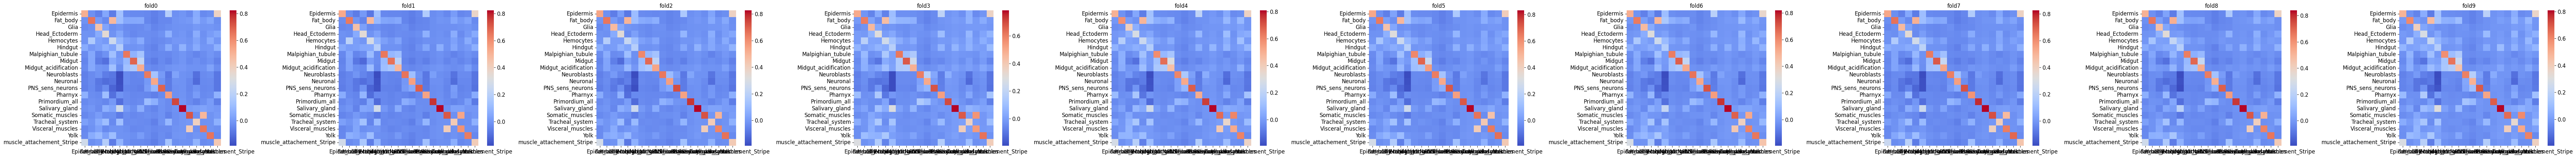

In [6]:
%matplotlib inline
crested.pl.heatmap.correlations_predictions(
    adata_hydrop,
    model_names=None,
    width=80,
    height=5,
    xlabel=None,
    ylabel=None,
    split="test"
)

2025-03-06T13:57:50.253050+0100 INFO Plotting heatmap correlations for split: test, models: ['fold0', 'fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9']


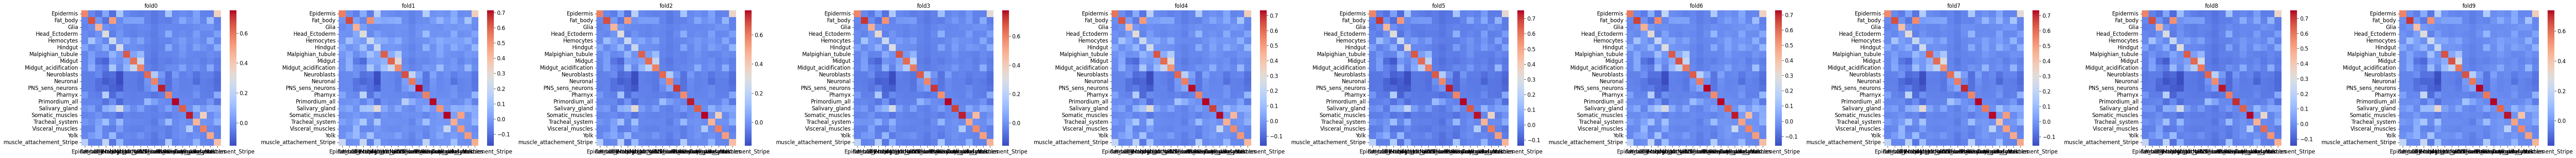

In [10]:

%matplotlib inline
crested.pl.heatmap.correlations_predictions(
    adata_multiome,
    model_names=None,
    width=80,
    height=5,
    xlabel=None,
    ylabel=None,
    split="test"
)

## TFmodisco

In [7]:
models_hydrop = []
for model in os.listdir(hydrop_model_folder_path):
    models_hydrop.append(keras.models.load_model(os.path.join(hydrop_model_folder_path, model)))

In [8]:
models_multiome = []
for model in os.listdir(multiome_model_folder_path):
    models_multiome.append(keras.models.load_model(os.path.join(multiome_model_folder_path, model)))

In [9]:
import pandas as pd

In [10]:
# average preds for hydrop over the folds
preds_hydrop_folds = []
for layer in adata_hydrop.layers:
    preds_hydrop_folds.append(adata_hydrop.layers[layer])
preds_hydrop = np.mean(preds_hydrop_folds, axis=0)

In [11]:
preds_multiome_folds = []
for layer in adata_multiome.layers:
    preds_multiome_folds.append(adata_multiome.layers[layer])
preds_multiome = np.mean(preds_multiome_folds, axis=0)

In [12]:
preds_hydrop = pd.DataFrame(preds_hydrop, columns=adata_hydrop.var_names, index=adata_hydrop.obs_names).T
preds_multiome = pd.DataFrame(preds_multiome, columns=adata_multiome.var_names, index=adata_multiome.obs_names).T

In [10]:
preds_hydrop.head(5)

,Epidermis,Fat_body,Glia,Head_Ectoderm,Hemocytes,Hindgut,Malpighian_tubule,Midgut,Midgut_acidification,Neuroblasts,Neuronal,PNS_sens_neurons,Pharnyx,Primordium_all,Salivary_gland,Somatic_muscles,Tracheal_system,Visceral_muscles,Yolk,muscle_attachement_Stripe
region,,,,,,,,,,,,,,,,,,,,
2L:53520-54020,0.005799,0.015408,0.038462,0.047293,0.033737,0.025077,0.007696,0.006727,0.010314,0.028202,0.020068,0.171990,0.012389,0.025019,0.014371,0.083223,0.095593,0.063323,0.029923,0.015945
2L:63683-64183,0.023056,0.007804,0.075319,0.276865,0.030278,0.045305,0.012074,0.002616,0.014744,0.006162,0.004016,0.010197,0.127288,0.008613,0.016929,0.013981,0.075081,0.012846,0.040467,0.058902
2L:148737-149237,0.033877,0.064468,0.070002,0.052808,0.130306,0.075520,0.047097,0.032427,0.035514,0.001306,0.001090,0.001775,0.014745,0.007494,0.030839,0.031436,0.039772,0.029377,0.062312,0.053823
2L:188964-189464,0.040359,0.052752,0.050485,0.030798,0.098426,0.078038,0.046861,0.052760,0.033925,0.002508,0.004237,0.004617,0.010487,0.009978,0.037992,0.032815,0.036242,0.030184,0.038322,0.046557
2L:216254-216754,0.019096,0.079394,0.064301,0.062149,0.141351,0.066462,0.287834,0.036572,0.046877,0.002986,0.007180,0.003123,0.014494,0.004078,0.031388,0.028548,0.032453,0.031971,0.073119,0.044524


In [11]:
preds_multiome.head(5)

,Epidermis,Fat_body,Glia,Head_Ectoderm,Hemocytes,Hindgut,Malpighian_tubule,Midgut,Midgut_acidification,Neuroblasts,Neuronal,PNS_sens_neurons,Pharnyx,Primordium_all,Salivary_gland,Somatic_muscles,Tracheal_system,Visceral_muscles,Yolk,muscle_attachement_Stripe
region,,,,,,,,,,,,,,,,,,,,
2L:6447-6947,0.006970,0.015655,0.040580,0.047340,0.048581,0.015802,0.010359,0.004750,0.014897,0.026976,0.012474,0.016263,0.011827,0.070216,0.019325,0.177193,0.038647,0.089058,0.035743,0.016257
2L:53520-54020,0.006128,0.019482,0.045274,0.044026,0.042085,0.021607,0.007435,0.007346,0.011386,0.027413,0.018707,0.154198,0.009502,0.038312,0.017694,0.055311,0.073427,0.055042,0.033616,0.013575
2L:63683-64183,0.015366,0.005596,0.044374,0.241944,0.023952,0.032899,0.009304,0.002207,0.014866,0.004835,0.003861,0.008243,0.108524,0.007684,0.015844,0.007768,0.044889,0.010758,0.022945,0.044261
2L:148737-149237,0.013567,0.036512,0.046914,0.038008,0.083157,0.037694,0.037169,0.020287,0.067427,0.000562,0.000594,0.001312,0.008609,0.004978,0.032440,0.024045,0.021659,0.027324,0.037509,0.027930
2L:197858-198358,0.019799,0.034543,0.051960,0.053176,0.082955,0.041952,0.041343,0.021029,0.072917,0.001195,0.001669,0.001465,0.026519,0.006438,0.033869,0.021336,0.022458,0.025467,0.039278,0.036213


In [15]:
# Hydrop: see how consistent selected regions are
top_k = 1000  # Define the number of top regions to consider
overlap_regions_folds = {}  # Dictionary to store overlap per class

for selected_class in adata_hydrop.obs_names:  # Iterate over classes (columns)
    fold_selected_regions = []

    for fold_preds in preds_hydrop_folds:  # Iterate over folds
        preds_sorted = pd.DataFrame(fold_preds, columns=adata_hydrop.var_names, index=adata_hydrop.obs_names).T
        top_regions = set(preds_sorted.sort_values(selected_class, ascending=False).head(top_k).index)
        fold_selected_regions.append(top_regions)

    # Compute intersection across all folds for this class
    overlap_regions_folds[selected_class] = set.intersection(*fold_selected_regions)

    # Print how many regions are consistent across folds
    print(f"{selected_class}: {len(overlap_regions_folds[selected_class])}")

Epidermis: 458
Fat_body: 385
Glia: 345
Head_Ectoderm: 212
Hemocytes: 325
Hindgut: 158
Malpighian_tubule: 477
Midgut: 476
Midgut_acidification: 393
Neuroblasts: 436
Neuronal: 397
PNS_sens_neurons: 395
Pharnyx: 339
Primordium_all: 425
Salivary_gland: 396
Somatic_muscles: 397
Tracheal_system: 280
Visceral_muscles: 315
Yolk: 408
muscle_attachement_Stripe: 302


In [16]:
top_k = 1000  # Define the number of top regions to consider
overlap_regions_folds = {}  # Dictionary to store overlap per class

for selected_class in adata_multiome.obs_names:  # Iterate over classes (columns)
    fold_selected_regions = []

    for fold_preds in preds_multiome_folds:  # Iterate over folds
        preds_sorted = pd.DataFrame(fold_preds, columns=adata_multiome.var_names, index=adata_multiome.obs_names).T
        top_regions = set(preds_sorted.sort_values(selected_class, ascending=False).head(top_k).index)
        fold_selected_regions.append(top_regions)

    # Compute intersection across all folds for this class
    overlap_regions_folds[selected_class] = set.intersection(*fold_selected_regions)

    # Print how many regions are consistent across folds
    print(f"{selected_class}: {len(overlap_regions_folds[selected_class])}")

Epidermis: 474
Fat_body: 422
Glia: 365
Head_Ectoderm: 189
Hemocytes: 290
Hindgut: 167
Malpighian_tubule: 458
Midgut: 469
Midgut_acidification: 368
Neuroblasts: 451
Neuronal: 367
PNS_sens_neurons: 397
Pharnyx: 347
Primordium_all: 436
Salivary_gland: 364
Somatic_muscles: 432
Tracheal_system: 279
Visceral_muscles: 347
Yolk: 429
muscle_attachement_Stripe: 299


In [20]:
# see which regions are selected based on top_k predictions for both models
# calculate average contrib scores for these regions per class 
top_k = 2000
overlap_regions = {}
for selected_class in preds_hydrop.columns:
    preds_sorted = preds_hydrop.sort_values(selected_class, ascending=False).head(top_k)
    selected_regions = set(preds_sorted.index)
    
    preds_sorted_multiome = preds_multiome.sort_values(selected_class, ascending=False).head(top_k)
    selected_regions_multiome = set(preds_sorted_multiome.index)

    overlap = selected_regions.intersection(selected_regions_multiome)
    overlap_regions[selected_class] = overlap

    print(f"{selected_class}: {len(overlap)}")

    # save the regions to a .bed file (tsv)
    with open(f"{modisco_out_folder}/selected_regions/{selected_class}.bed", "w") as f:
        for region in overlap:
            chrom, start_end = region.split(":")
            start, end = start_end.split("-")
            f.write(f"{chrom}\t{start}\t{end}\n")

    # contrib scores hydrop for this class
    adata_filtered_hydrop = adata_hydrop[selected_class,list(overlap)]
    adata_filtered_hydrop.var['Class name'] = selected_class
    if not os.path.exists(f"{modisco_out_folder}/modisco_results_hydrop/{selected_class}_contrib.npz"):
        target_id = adata_hydrop.obs_names.get_loc(selected_class)
        crested.tl.contribution_scores(
            input=list(overlap),
            target_idx=target_id,
            model=models_hydrop,
            output_dir=f"{modisco_out_folder}/modisco_results_hydrop",
            transpose=True,
            all_class_names=list(adata_hydrop.obs_names),
            method="integrated_grad",
        )

    # contrib scores multiome for this class
    # adata_filtered_multiome = adata_multiome[selected_class,list(overlap)]
    # adata_filtered_multiome.var['Class name'] = selected_class
    if not os.path.exists(f"{modisco_out_folder}/modisco_results_10x/{selected_class}_contrib.npz"):
        target_id = adata_multiome.obs_names.get_loc(selected_class)
        crested.tl.contribution_scores(
            input=list(overlap),
            target_idx=target_id,
            model=models_multiome,
            output_dir=f"{modisco_out_folder}/modisco_results_10x",
            transpose=True,
            all_class_names=list(adata_multiome.obs_names),
            method="integrated_grad",
        )

Epidermis: 1590


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T15:27:14.163857+0200 INFO Calculating contribution scores for 1 class(es) and 1590 region(s).


Model: 100%|██████████| 10/10 [03:30<00:00, 21.03s/it]


2025-07-29T15:30:48.038021+0200 INFO Calculating contribution scores for 1 class(es) and 1590 region(s).


Model: 100%|██████████| 10/10 [03:08<00:00, 18.84s/it]


Fat_body: 1508


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T15:34:04.759865+0200 INFO Calculating contribution scores for 1 class(es) and 1508 region(s).


Model: 100%|██████████| 10/10 [02:58<00:00, 17.81s/it]


2025-07-29T15:37:06.298876+0200 INFO Calculating contribution scores for 1 class(es) and 1508 region(s).


Model: 100%|██████████| 10/10 [02:58<00:00, 17.87s/it]


Glia: 1419


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T15:40:11.855292+0200 INFO Calculating contribution scores for 1 class(es) and 1419 region(s).


Model: 100%|██████████| 10/10 [02:49<00:00, 16.94s/it]


2025-07-29T15:43:04.410697+0200 INFO Calculating contribution scores for 1 class(es) and 1419 region(s).


Model: 100%|██████████| 10/10 [02:48<00:00, 16.84s/it]


Head_Ectoderm: 1241


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T15:45:58.153153+0200 INFO Calculating contribution scores for 1 class(es) and 1241 region(s).


Model: 100%|██████████| 10/10 [02:27<00:00, 14.74s/it]


2025-07-29T15:48:28.301333+0200 INFO Calculating contribution scores for 1 class(es) and 1241 region(s).


Model: 100%|██████████| 10/10 [02:27<00:00, 14.76s/it]


Hemocytes: 1310


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T15:50:59.240764+0200 INFO Calculating contribution scores for 1 class(es) and 1310 region(s).


Model: 100%|██████████| 10/10 [02:36<00:00, 15.60s/it]


2025-07-29T15:53:38.178964+0200 INFO Calculating contribution scores for 1 class(es) and 1310 region(s).


Model: 100%|██████████| 10/10 [02:35<00:00, 15.56s/it]


Hindgut: 893


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T15:56:18.355581+0200 INFO Calculating contribution scores for 1 class(es) and 893 region(s).


Model: 100%|██████████| 10/10 [01:46<00:00, 10.63s/it]


2025-07-29T15:58:06.789865+0200 INFO Calculating contribution scores for 1 class(es) and 893 region(s).


Model: 100%|██████████| 10/10 [01:45<00:00, 10.60s/it]


Malpighian_tubule: 1617


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T15:59:56.164019+0200 INFO Calculating contribution scores for 1 class(es) and 1617 region(s).


Model: 100%|██████████| 10/10 [03:11<00:00, 19.13s/it]


2025-07-29T16:03:11.130265+0200 INFO Calculating contribution scores for 1 class(es) and 1617 region(s).


Model: 100%|██████████| 10/10 [03:11<00:00, 19.14s/it]


Midgut: 1683


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T16:06:27.103517+0200 INFO Calculating contribution scores for 1 class(es) and 1683 region(s).


Model: 100%|██████████| 10/10 [03:19<00:00, 19.90s/it]


2025-07-29T16:09:49.956830+0200 INFO Calculating contribution scores for 1 class(es) and 1683 region(s).


Model: 100%|██████████| 10/10 [03:19<00:00, 19.93s/it]


Midgut_acidification: 1461


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T16:13:13.458122+0200 INFO Calculating contribution scores for 1 class(es) and 1461 region(s).


Model: 100%|██████████| 10/10 [02:53<00:00, 17.33s/it]


2025-07-29T16:16:10.102825+0200 INFO Calculating contribution scores for 1 class(es) and 1461 region(s).


Model: 100%|██████████| 10/10 [02:53<00:00, 17.36s/it]


Neuroblasts: 1560


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T16:19:08.562801+0200 INFO Calculating contribution scores for 1 class(es) and 1560 region(s).


Model: 100%|██████████| 10/10 [03:04<00:00, 18.46s/it]


2025-07-29T16:22:16.827783+0200 INFO Calculating contribution scores for 1 class(es) and 1560 region(s).


Model: 100%|██████████| 10/10 [03:03<00:00, 18.32s/it]


Neuronal: 1302


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T16:25:24.952632+0200 INFO Calculating contribution scores for 1 class(es) and 1302 region(s).


Model: 100%|██████████| 10/10 [02:34<00:00, 15.45s/it]


2025-07-29T16:28:03.619298+0200 INFO Calculating contribution scores for 1 class(es) and 1302 region(s).


Model: 100%|██████████| 10/10 [02:33<00:00, 15.39s/it]


PNS_sens_neurons: 1612


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T16:30:40.886372+0200 INFO Calculating contribution scores for 1 class(es) and 1612 region(s).


Model: 100%|██████████| 10/10 [03:16<00:00, 19.65s/it]


2025-07-29T16:34:01.075385+0200 INFO Calculating contribution scores for 1 class(es) and 1612 region(s).


Model: 100%|██████████| 10/10 [03:11<00:00, 19.15s/it]


Pharnyx: 1517


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T16:37:16.345978+0200 INFO Calculating contribution scores for 1 class(es) and 1517 region(s).


Model: 100%|██████████| 10/10 [02:59<00:00, 17.93s/it]


2025-07-29T16:40:19.012476+0200 INFO Calculating contribution scores for 1 class(es) and 1517 region(s).


Model: 100%|██████████| 10/10 [02:59<00:00, 17.93s/it]


Primordium_all: 1649


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T16:43:21.989441+0200 INFO Calculating contribution scores for 1 class(es) and 1649 region(s).


Model: 100%|██████████| 10/10 [03:14<00:00, 19.43s/it]


2025-07-29T16:46:40.069631+0200 INFO Calculating contribution scores for 1 class(es) and 1649 region(s).


Model: 100%|██████████| 10/10 [03:14<00:00, 19.48s/it]


Salivary_gland: 1227


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T16:49:58.611544+0200 INFO Calculating contribution scores for 1 class(es) and 1227 region(s).


Model: 100%|██████████| 10/10 [02:24<00:00, 14.47s/it]


2025-07-29T16:52:26.087388+0200 INFO Calculating contribution scores for 1 class(es) and 1227 region(s).


Model: 100%|██████████| 10/10 [02:27<00:00, 14.78s/it]


Somatic_muscles: 1601


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T16:54:57.205044+0200 INFO Calculating contribution scores for 1 class(es) and 1601 region(s).


Model: 100%|██████████| 10/10 [03:09<00:00, 18.90s/it]


2025-07-29T16:58:09.885435+0200 INFO Calculating contribution scores for 1 class(es) and 1601 region(s).


Model: 100%|██████████| 10/10 [03:09<00:00, 18.93s/it]


Tracheal_system: 1281


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T17:01:22.952549+0200 INFO Calculating contribution scores for 1 class(es) and 1281 region(s).


Model: 100%|██████████| 10/10 [02:32<00:00, 15.21s/it]


2025-07-29T17:03:57.872150+0200 INFO Calculating contribution scores for 1 class(es) and 1281 region(s).


Model: 100%|██████████| 10/10 [02:30<00:00, 15.08s/it]


Visceral_muscles: 1588


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T17:06:31.663958+0200 INFO Calculating contribution scores for 1 class(es) and 1588 region(s).


Model: 100%|██████████| 10/10 [03:07<00:00, 18.75s/it]


2025-07-29T17:09:42.674306+0200 INFO Calculating contribution scores for 1 class(es) and 1588 region(s).


Model: 100%|██████████| 10/10 [03:07<00:00, 18.78s/it]


Yolk: 1350


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T17:12:55.262852+0200 INFO Calculating contribution scores for 1 class(es) and 1350 region(s).


Model: 100%|██████████| 10/10 [02:39<00:00, 15.96s/it]


2025-07-29T17:15:37.940325+0200 INFO Calculating contribution scores for 1 class(es) and 1350 region(s).


Model: 100%|██████████| 10/10 [02:39<00:00, 15.93s/it]


muscle_attachement_Stripe: 1456


/tmp/ipykernel_2886868/834724428.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_filtered_hydrop.var['Class name'] = selected_class


2025-07-29T17:18:20.499474+0200 INFO Calculating contribution scores for 1 class(es) and 1456 region(s).


Model: 100%|██████████| 10/10 [02:52<00:00, 17.26s/it]


2025-07-29T17:21:16.397805+0200 INFO Calculating contribution scores for 1 class(es) and 1456 region(s).


Model: 100%|██████████| 10/10 [02:52<00:00, 17.29s/it]


## Run TF-modisco

In [24]:
meme_db = "../../../../../../../../eceksi/resources/motifs-v10-nr.cluster.flybase-m0.00001-o0.0.ensembl108_collNames.meme"

In [25]:
# run tfmodisco on the contribution scores
crested.tl.modisco.tfmodisco(
    window=500,
    output_dir=f"{modisco_out_folder}/modisco_results_hydrop",
    contrib_dir=f"{modisco_out_folder}/modisco_results_hydrop",
    report=True,
    meme_db=meme_db,
    max_seqlets=20000,
)

2025-07-29T17:29:57.344160+0200 INFO No class names provided, using all found in the contribution directory: ['Glia', 'Neuroblasts', 'Yolk', 'Primordium_all', 'Pharnyx', 'Neuronal', 'muscle_attachement_Stripe', 'Malpighian_tubule', 'PNS_sens_neurons', 'Salivary_gland', 'Hindgut', 'Tracheal_system', 'Hemocytes', 'Somatic_muscles', 'Fat_body', 'Visceral_muscles', 'Midgut_acidification', 'Head_Ectoderm', 'Epidermis', 'Midgut']
2025-07-29T17:29:57.683126+0200 INFO Running modisco for class: Glia
Using 1415 positive seqlets
Extracted 113 negative seqlets
2025-07-29T17:32:07.544124+0200 ERROR `tomtom` executable could not be called globally or locally. Please install it and try again. You may install it using conda with `conda install -c bioconda meme`
Traceback (most recent call last):

  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/lustre1/project/stg_00002/mambaforge/vsc35862/envs/crested_torch/lib/python3.11/site-packages

ValueError: `tomtom` executable could not be called globally or locally. Please install it and try again. You may install it using conda with `conda install -c bioconda meme`

In [ ]:
# run tfmodisco on the contribution scores
crested.tl.modisco.tfmodisco(
    window=500,
    output_dir="{modisco_out_folder}/modisco_results_hydrop",
    contrib_dir="{modisco_out_folder}/modisco_results_hydrop",
    report=True,
    meme_db=meme_db,
    max_seqlets=20000,
)

2025-03-10T10:35:22.116803+0100 INFO Starting genomic contributions plot for classes: ['Epidermis', 'Glia', 'Neuronal', 'Neuroblasts', 'Midgut']


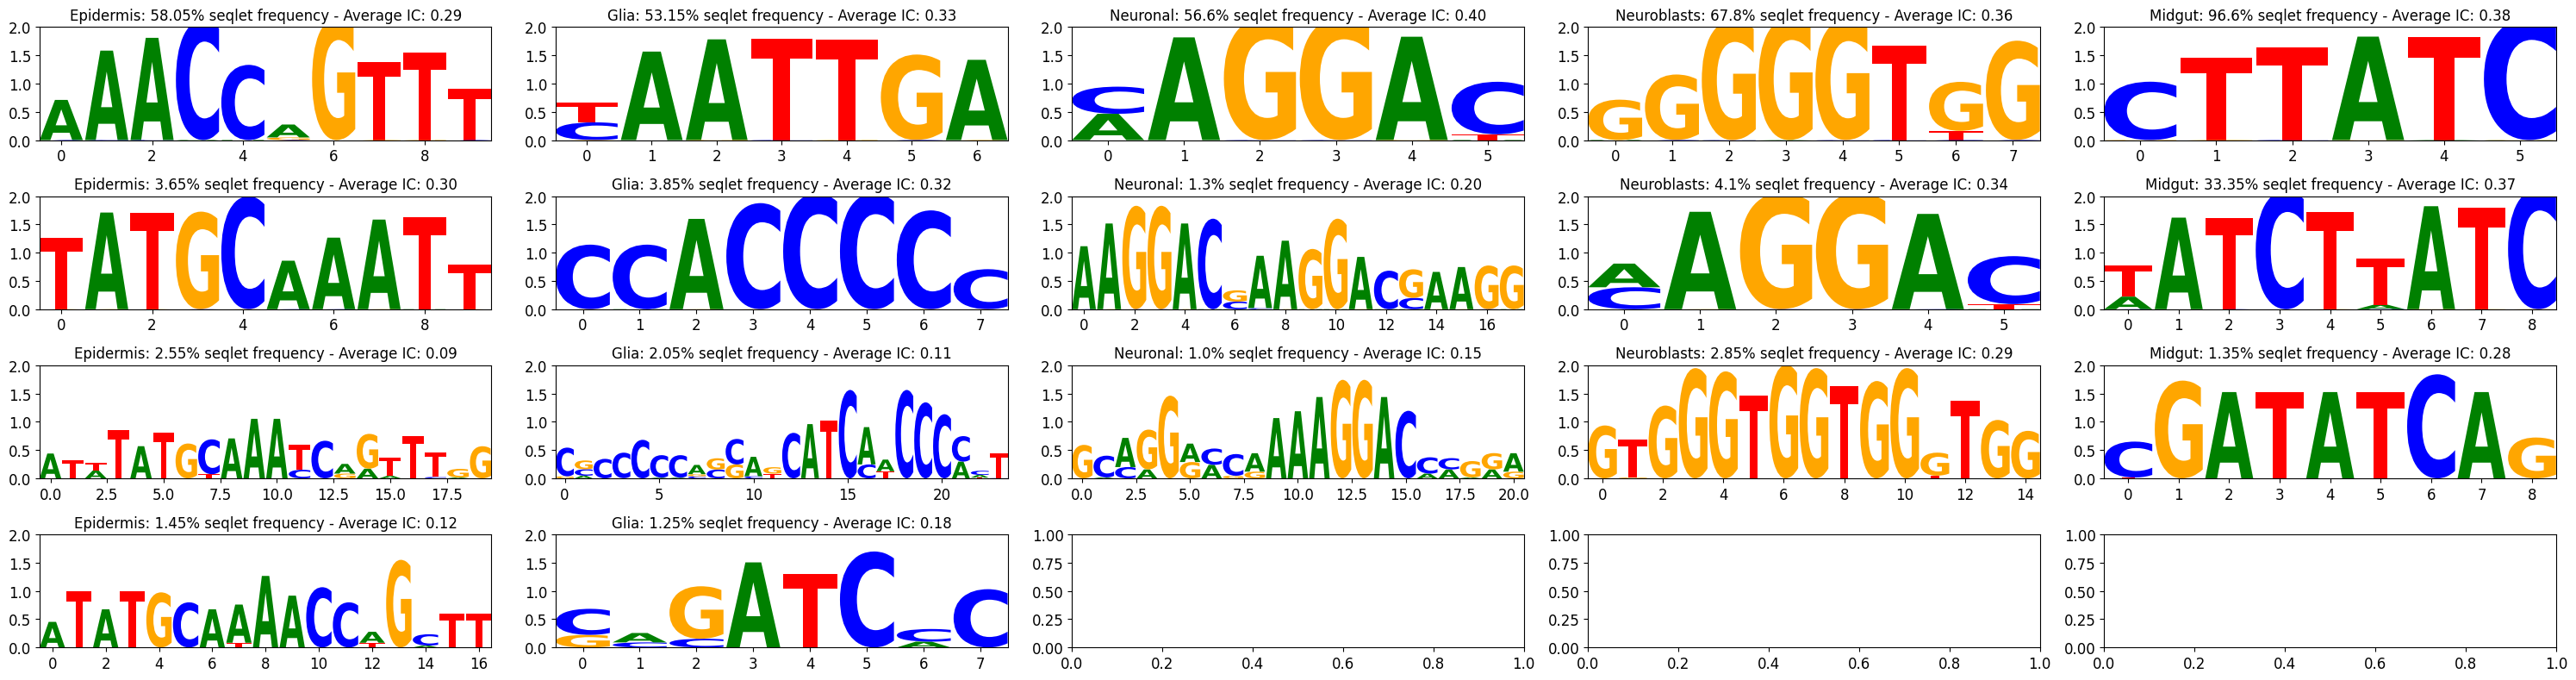

In [7]:
%matplotlib inline
top_k = 2000
crested.pl.patterns.modisco_results(
    classes=["Epidermis", "Glia", "Neuronal", "Neuroblasts", "Midgut"],
    contribution="positive",
    contribution_dir=f"{modisco_out_folder}/modisco_results_hydrop",
    num_seq=top_k,
    y_max=0.15,
    viz="pwm",
)  

In [8]:
# run tfmodisco on the contribution scores
crested.tl.modisco.tfmodisco(
    window=500,
    output_dir=f"{modisco_out_folder}/modisco_results_10x",
    contrib_dir=f"{modisco_out_folder}/modisco_results_10x",
    report=True,
    meme_db=meme_db,
    max_seqlets=20000,
)

2025-03-10T10:43:41.703002+0100 INFO No class names provided, using all found in the contribution directory: ['Malpighian_tubule', 'Visceral_muscles', 'Hindgut', 'Yolk', 'Tracheal_system', 'Somatic_muscles', 'Glia', 'Fat_body', 'muscle_attachement_Stripe', 'Salivary_gland', 'Hemocytes', 'Midgut', 'Head_Ectoderm', 'Primordium_all', 'Neuronal', 'Neuroblasts', 'PNS_sens_neurons', 'Epidermis', 'Pharnyx', 'Midgut_acidification']
2025-03-10T10:43:41.891676+0100 INFO Running modisco for class: Malpighian_tubule
Using 4392 positive seqlets
Extracted 728 negative seqlets
2025-03-10T10:52:38.535396+0100 INFO Running modisco for class: Visceral_muscles
Using 1574 positive seqlets
2025-03-10T11:02:37.560137+0100 INFO Running modisco for class: Hindgut
Using 863 positive seqlets
2025-03-10T11:07:19.246990+0100 INFO Running modisco for class: Yolk
Using 1309 positive seqlets
2025-03-10T11:28:53.724958+0100 INFO Running modisco for class: Tracheal_system
Using 1464 positive seqlets
Extracted 257 nega

In [10]:
# run tfmodisco on the contribution scores
crested.tl.modisco.tfmodisco(
    window=500,
    output_dir="../data/modisco_results_10x",
    contrib_dir="../data/modisco_results_10x",
    report=True,
    meme_db=meme_db,
    max_seqlets=20000,
)

2025-03-10T13:49:23.556214+0100 INFO No class names provided, using all found in the contribution directory: ['Malpighian_tubule', 'Visceral_muscles', 'Hindgut', 'Yolk', 'Tracheal_system', 'Somatic_muscles', 'Glia', 'Fat_body', 'muscle_attachement_Stripe', 'Salivary_gland', 'Hemocytes', 'Midgut', 'Head_Ectoderm', 'Primordium_all', 'Neuronal', 'Neuroblasts', 'PNS_sens_neurons', 'Epidermis', 'Pharnyx', 'Midgut_acidification']
Modisco results already exist for class: Malpighian_tubule
Modisco results already exist for class: Visceral_muscles
Modisco results already exist for class: Hindgut
Modisco results already exist for class: Yolk
Modisco results already exist for class: Tracheal_system
Modisco results already exist for class: Somatic_muscles
Modisco results already exist for class: Glia
Modisco results already exist for class: Fat_body
Modisco results already exist for class: muscle_attachement_Stripe
Modisco results already exist for class: Salivary_gland
Modisco results already exi

2025-03-10T13:49:54.801288+0100 INFO Starting genomic contributions plot for classes: ['Epidermis', 'Glia', 'Neuronal', 'Neuroblasts', 'Midgut']


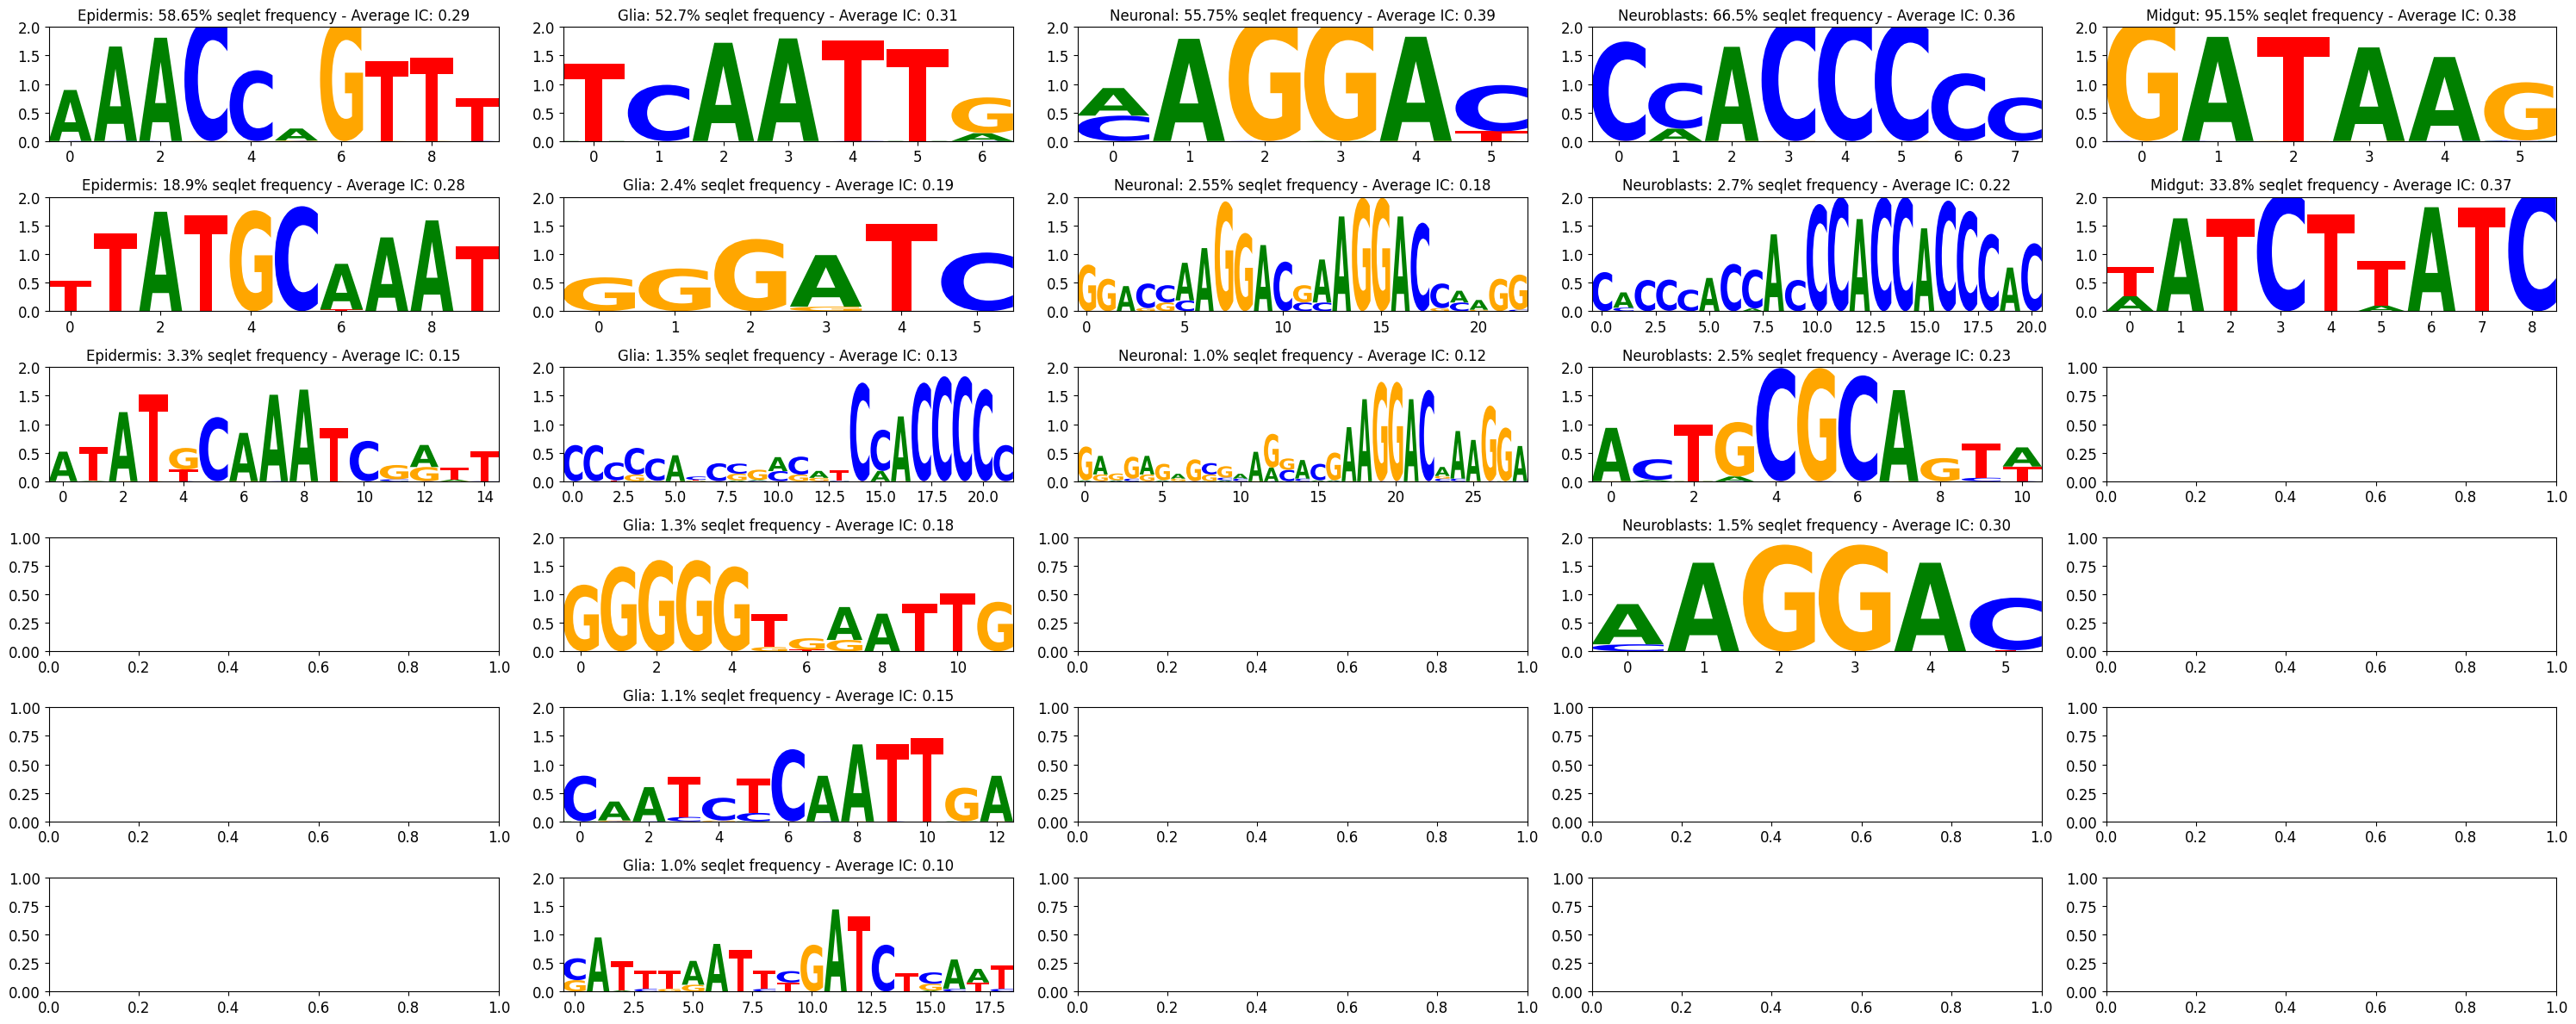

In [11]:
%matplotlib inline
top_k = 2000
crested.pl.patterns.modisco_results(
    classes=["Epidermis", "Glia", "Neuronal", "Neuroblasts", "Midgut"],
    contribution="positive",
    contribution_dir="../data/modisco_results_10x",
    num_seq=top_k,
    y_max=0.15,
    viz="pwm",
)  

## Matching patterns

In [5]:
matched_files = crested.tl.modisco.match_h5_files_to_classes(
    contribution_dir="../data/modisco_results_hydrop", classes=list(adata_hydrop.obs_names)
)

In [14]:
matched_files_epidermis = {
    "Epidermis_hydrop": "../data/modisco_results_hydrop/Epidermis_modisco_results.h5",
    "Epidermis_10x": "../data/modisco_results_10x/Epidermis_modisco_results.h5",
}

In [16]:
# Then we cluster matching patterns, and define a pattern matrix [#classes, #patterns] describing their importance
all_patterns = crested.tl.modisco.process_patterns(
    matched_files_epidermis,
    sim_threshold=4.25,  
    trim_ic_threshold=0.05,  
    discard_ic_threshold=0.2,  
    verbose=True,  
)
pattern_matrix = crested.tl.modisco.create_pattern_matrix(
    classes=["Epidermis_hydrop", "Epidermis_10x"],
    all_patterns=all_patterns,
    normalize=False,
    pattern_parameter="seqlet_count_log",
)
pattern_matrix.shape

Reading file ../data/modisco_results_hydrop/Epidermis_modisco_results.h5
Reading file ../data/modisco_results_10x/Epidermis_modisco_results.h5
Match between Epidermis_10x_neg_patterns_2 and Epidermis_hydrop_neg_patterns_3 with similarity score 4.67
Match between Epidermis_10x_neg_patterns_5 and Epidermis_hydrop_neg_patterns_2 with similarity score 6.83
Match between Epidermis_10x_neg_patterns_6 and Epidermis_10x_neg_patterns_5 with similarity score 5.18
Match between Epidermis_10x_neg_patterns_7 and Epidermis_hydrop_neg_patterns_4 with similarity score 12.00
Match between Epidermis_10x_pos_patterns_0 and Epidermis_hydrop_pos_patterns_0 with similarity score 10.25
Match between Epidermis_10x_pos_patterns_1 and Epidermis_hydrop_pos_patterns_1 with similarity score 8.02
Match between Epidermis_10x_pos_patterns_2 and Epidermis_hydrop_pos_patterns_2 with similarity score 7.62
Merged patterns Epidermis_hydrop_neg_patterns_1 and Epidermis_10x_neg_patterns_1 with similarity 6.517746295493497
M

(2, 10)

/lustre1/project/stg_00002/mambaforge/vsc35862/envs/crested_torch/lib/python3.12/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x14780ee4ce60>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/lustre1/project/stg_00002/mambaforge/vsc35862/envs/crested_torch/lib/python3.12/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x14780ee84440>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/lustre1/project/stg_00002/mambaforge/vsc35862/envs/crested_torch/lib/python3.12/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtyp

/lustre1/project/stg_00002/mambaforge/vsc35862/envs/crested_torch/lib/python3.12/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x14780e9d8410>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/lustre1/project/stg_00002/mambaforge/vsc35862/envs/crested_torch/lib/python3.12/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x14780ec3f440>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/lustre1/project/stg_00002/mambaforge/vsc35862/envs/crested_torch/lib/python3.12/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtyp

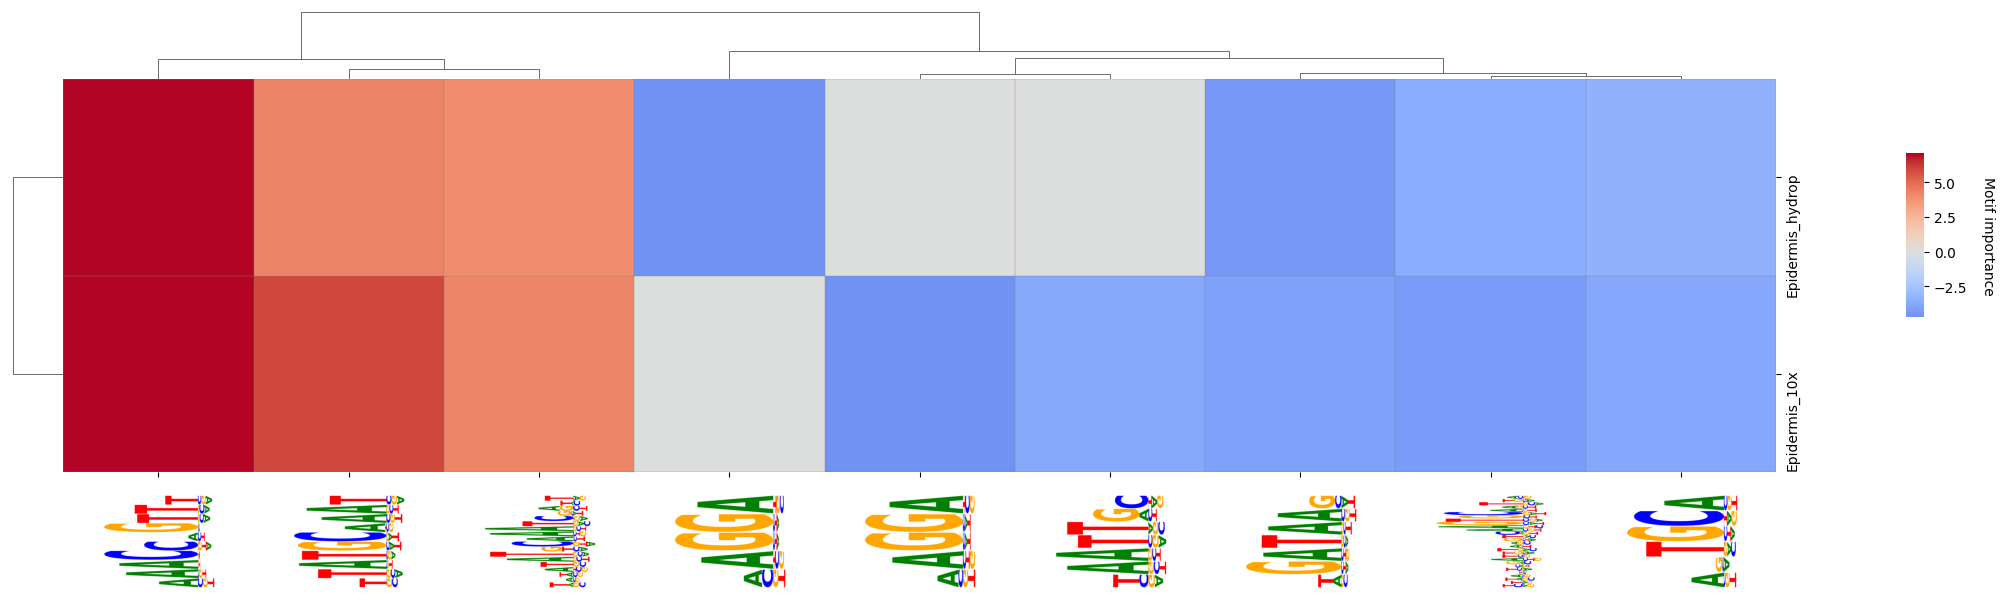

In [37]:
%matplotlib inline
import matplotlib
 
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

crested.pl.patterns.clustermap_with_pwm_logos(
    pattern_matrix,
    ["Epidermis_hydrop", "Epidermis_10x"],
    pattern_dict=all_patterns,
    figsize=(18.2, 4.2),
    grid=True,
    dendrogram_ratio=(0.03, 0.15),
    importance_threshold=3.5,  # 3.5,
    logo_height_fraction=0.3,
    logo_y_padding=0.1,
)

In [38]:
matched_files_glia_neuronal = {
    "Glia_hydrop": "../data/modisco_results_hydrop/Glia_modisco_results.h5",
    "Glia_10x": "../data/modisco_results_10x/Glia_modisco_results.h5",
    "Neuronal_hydrop": "../data/modisco_results_hydrop/Neuronal_modisco_results.h5",
    "Neuronal_10x": "../data/modisco_results_10x/Neuronal_modisco_results.h5",
    "Neuroblasts_hydrop": "../data/modisco_results_hydrop/Neuroblasts_modisco_results.h5",
    "Neuroblasts_10x": "../data/modisco_results_10x/Neuroblasts_modisco_results.h5",
}

In [39]:
all_patterns = crested.tl.modisco.process_patterns(
    matched_files_glia_neuronal,
    sim_threshold=4.25,  
    trim_ic_threshold=0.05,  
    discard_ic_threshold=0.2,  
    verbose=True,  
)
pattern_matrix = crested.tl.modisco.create_pattern_matrix(
    classes=["Glia_hydrop", "Glia_10x", "Neuronal_hydrop", "Neuronal_10x", "Neuroblasts_hydrop", "Neuroblasts_10x"],
    all_patterns=all_patterns,
    normalize=False,
    pattern_parameter="seqlet_count_log",
)
pattern_matrix.shape

Reading file ../data/modisco_results_hydrop/Glia_modisco_results.h5
Reading file ../data/modisco_results_10x/Glia_modisco_results.h5
Match between Glia_10x_pos_patterns_0 and Glia_hydrop_pos_patterns_0 with similarity score 8.03
Match between Glia_10x_pos_patterns_2 and Glia_hydrop_pos_patterns_1 with similarity score 10.84
Match between Glia_10x_pos_patterns_3 and Glia_hydrop_pos_patterns_1 with similarity score 4.43
Reading file ../data/modisco_results_hydrop/Neuronal_modisco_results.h5
Match between Neuronal_hydrop_pos_patterns_0 and Glia_hydrop_neg_patterns_0 with similarity score 5.42
Match between Neuronal_hydrop_pos_patterns_2 and Neuronal_hydrop_pos_patterns_0 with similarity score 4.37
Reading file ../data/modisco_results_10x/Neuronal_modisco_results.h5
Match between Neuronal_10x_pos_patterns_0 and Neuronal_hydrop_pos_patterns_0 with similarity score 4.97
Match between Neuronal_10x_pos_patterns_1 and Neuronal_hydrop_pos_patterns_1 with similarity score 12.00
Match between Neur

(6, 10)

/lustre1/project/stg_00002/mambaforge/vsc35862/envs/crested_torch/lib/python3.12/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x14780e7d2150>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/lustre1/project/stg_00002/mambaforge/vsc35862/envs/crested_torch/lib/python3.12/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x14780e7204a0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/lustre1/project/stg_00002/mambaforge/vsc35862/envs/crested_torch/lib/python3.12/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtyp

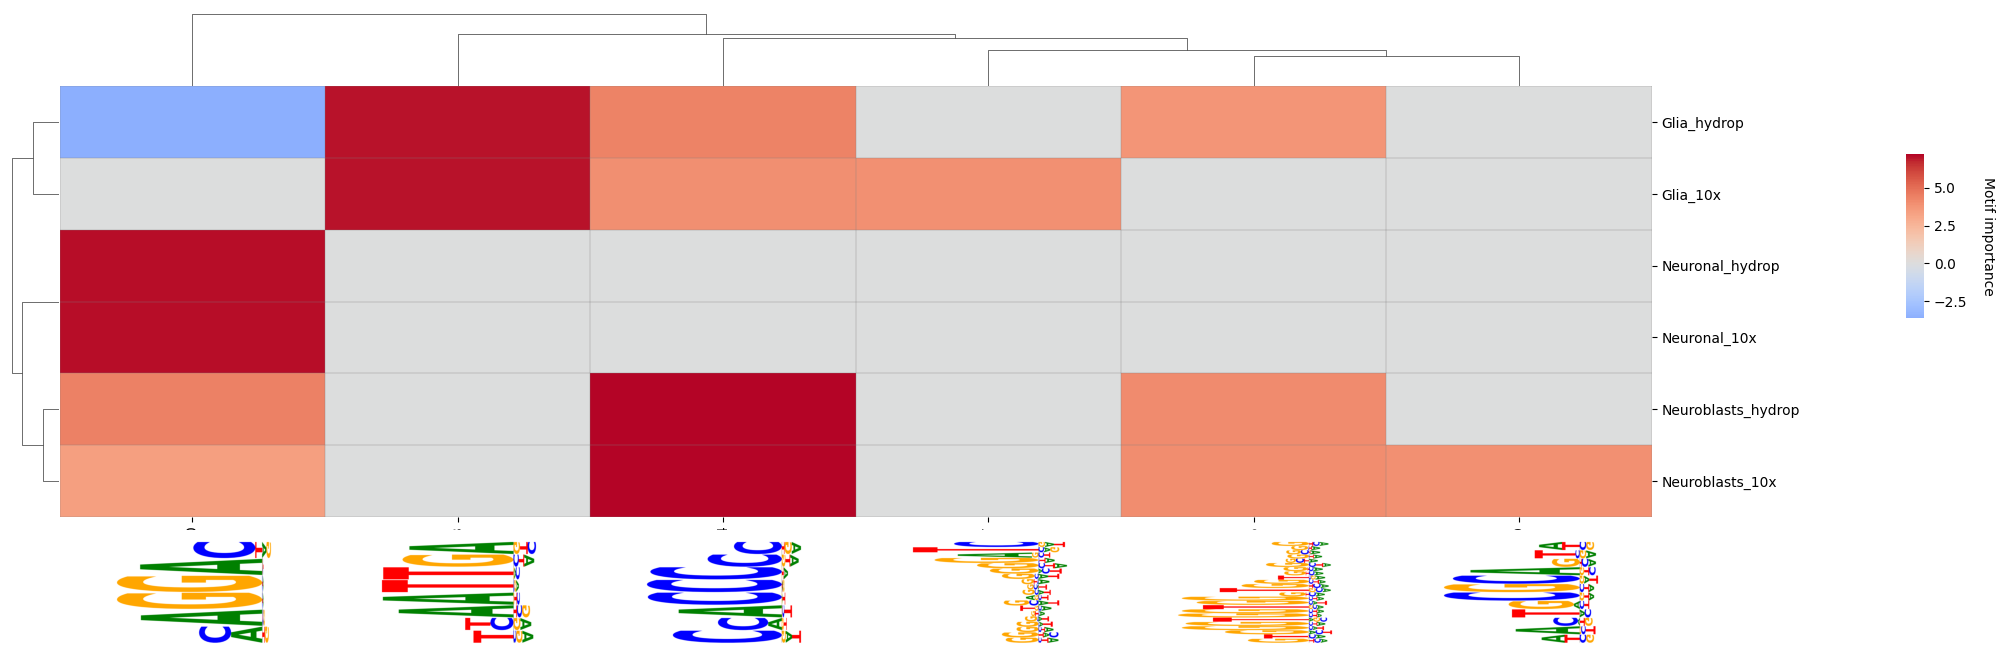

In [42]:
crested.pl.patterns.clustermap_with_pwm_logos(
    pattern_matrix,
    ["Glia_hydrop", "Glia_10x", "Neuronal_hydrop", "Neuronal_10x", "Neuroblasts_hydrop", "Neuroblasts_10x"],
    pattern_dict=all_patterns,
    figsize=(18.2, 4.2),
    grid=True,
    dendrogram_ratio=(0.03, 0.15),
    importance_threshold=3.5,
    logo_height_fraction=0.3,
    logo_y_padding=0.1,
)

In [43]:
matched_files_midgut = {
    "Midgut_hydrop": "../data/modisco_results_hydrop/Midgut_modisco_results.h5",
    "Midgut_10x": "../data/modisco_results_10x/Midgut_modisco_results.h5",
}

In [44]:
all_patterns = crested.tl.modisco.process_patterns(
    matched_files_midgut,
    sim_threshold=4.25,  
    trim_ic_threshold=0.05,  
    discard_ic_threshold=0.2,  
    verbose=True,  
)
pattern_matrix = crested.tl.modisco.create_pattern_matrix(
    classes=["Midgut_hydrop", "Midgut_10x"],
    all_patterns=all_patterns,
    normalize=False,
    pattern_parameter="seqlet_count_log",
)
pattern_matrix.shape

Reading file ../data/modisco_results_hydrop/Midgut_modisco_results.h5
Reading file ../data/modisco_results_10x/Midgut_modisco_results.h5
Match between Midgut_10x_pos_patterns_0 and Midgut_hydrop_pos_patterns_0 with similarity score 7.12
Match between Midgut_10x_pos_patterns_1 and Midgut_hydrop_pos_patterns_1 with similarity score 11.81
Merged patterns Midgut_hydrop_neg_patterns_0 and Midgut_hydrop_neg_patterns_2 with similarity 5.883607907369405
Iteration 1: Merging complete, checking again
Discarded 0 patterns below IC threshold 0.2 and with a single class instance:
[]
Total iterations: 1


(2, 5)

/lustre1/project/stg_00002/mambaforge/vsc35862/envs/crested_torch/lib/python3.12/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x14780e13b440>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/lustre1/project/stg_00002/mambaforge/vsc35862/envs/crested_torch/lib/python3.12/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x14780e7d32c0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/lustre1/project/stg_00002/mambaforge/vsc35862/envs/crested_torch/lib/python3.12/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtyp

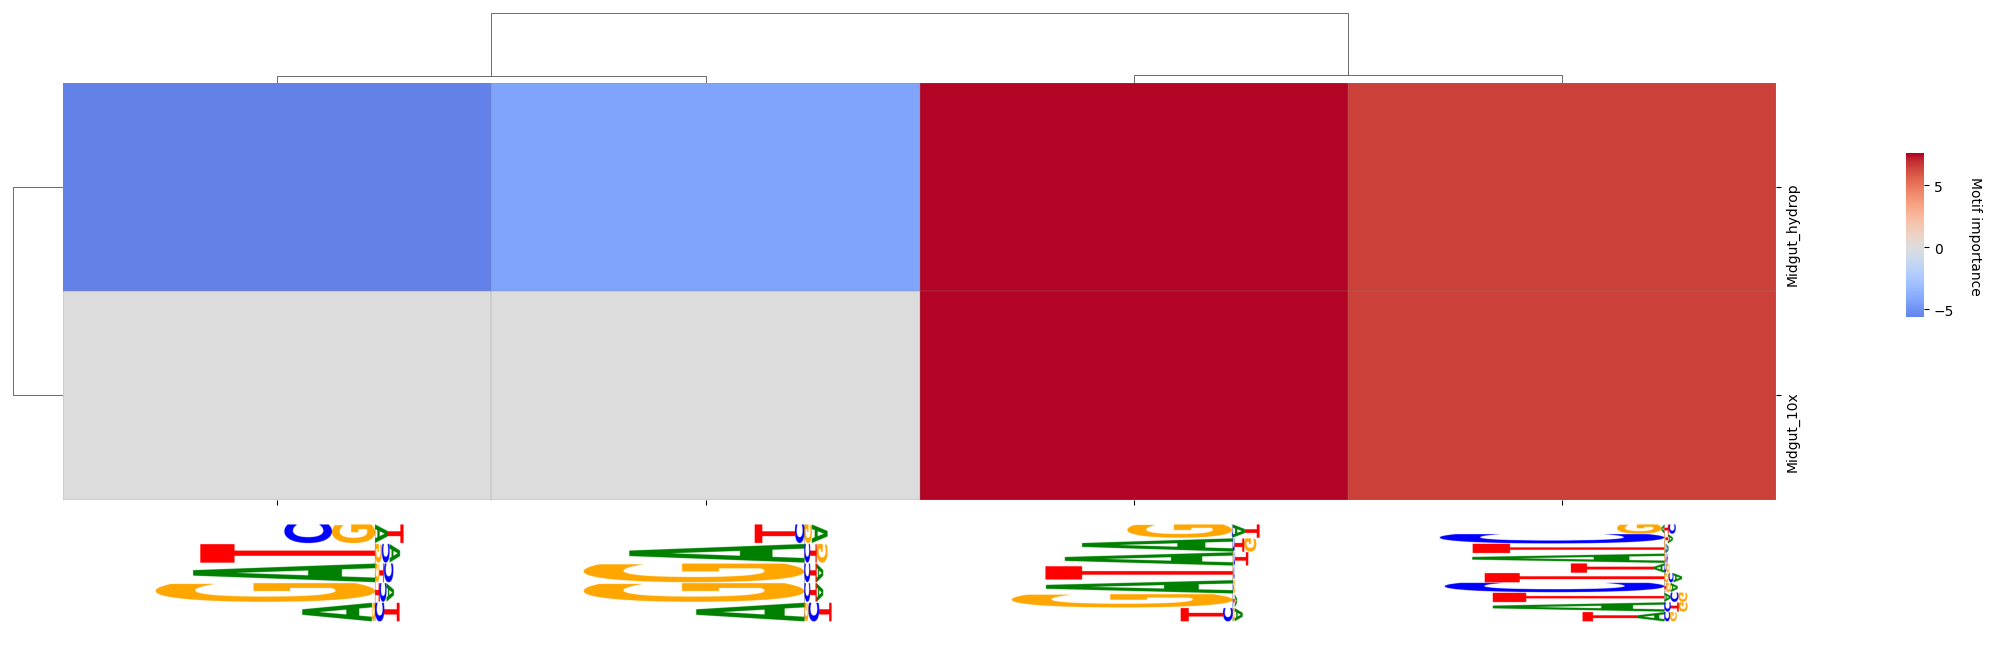

In [45]:
crested.pl.patterns.clustermap_with_pwm_logos(
    pattern_matrix,
    ["Midgut_hydrop", "Midgut_10x"],
    pattern_dict=all_patterns,
    figsize=(18.2, 4.2),
    grid=True,
    dendrogram_ratio=(0.03, 0.15),
    importance_threshold=3.5,
    logo_height_fraction=0.3,
    logo_y_padding=0.1,
)

## Investigate individual regions

In [26]:
# region_of_interest
region_of_interest = "2L:6075155-6075655"
classes_of_interest = None

contribs, one_hots = crested.tl.contribution_scores(
    input=region_of_interest,
    model=models_hydrop,
    target_idx=None,
    method="integrated_grad",
)
crested.pl.patterns.contribution_scores(
    contribs,
    one_hots,
    class_labels=list(adata_hydrop.obs_names),
)

2025-03-07T15:28:11.617384+0100 INFO Calculating contribution scores for 20 class(es) and 1 region(s).


Model: 100%|██████████| 10/10 [00:15<00:00,  1.54s/it]


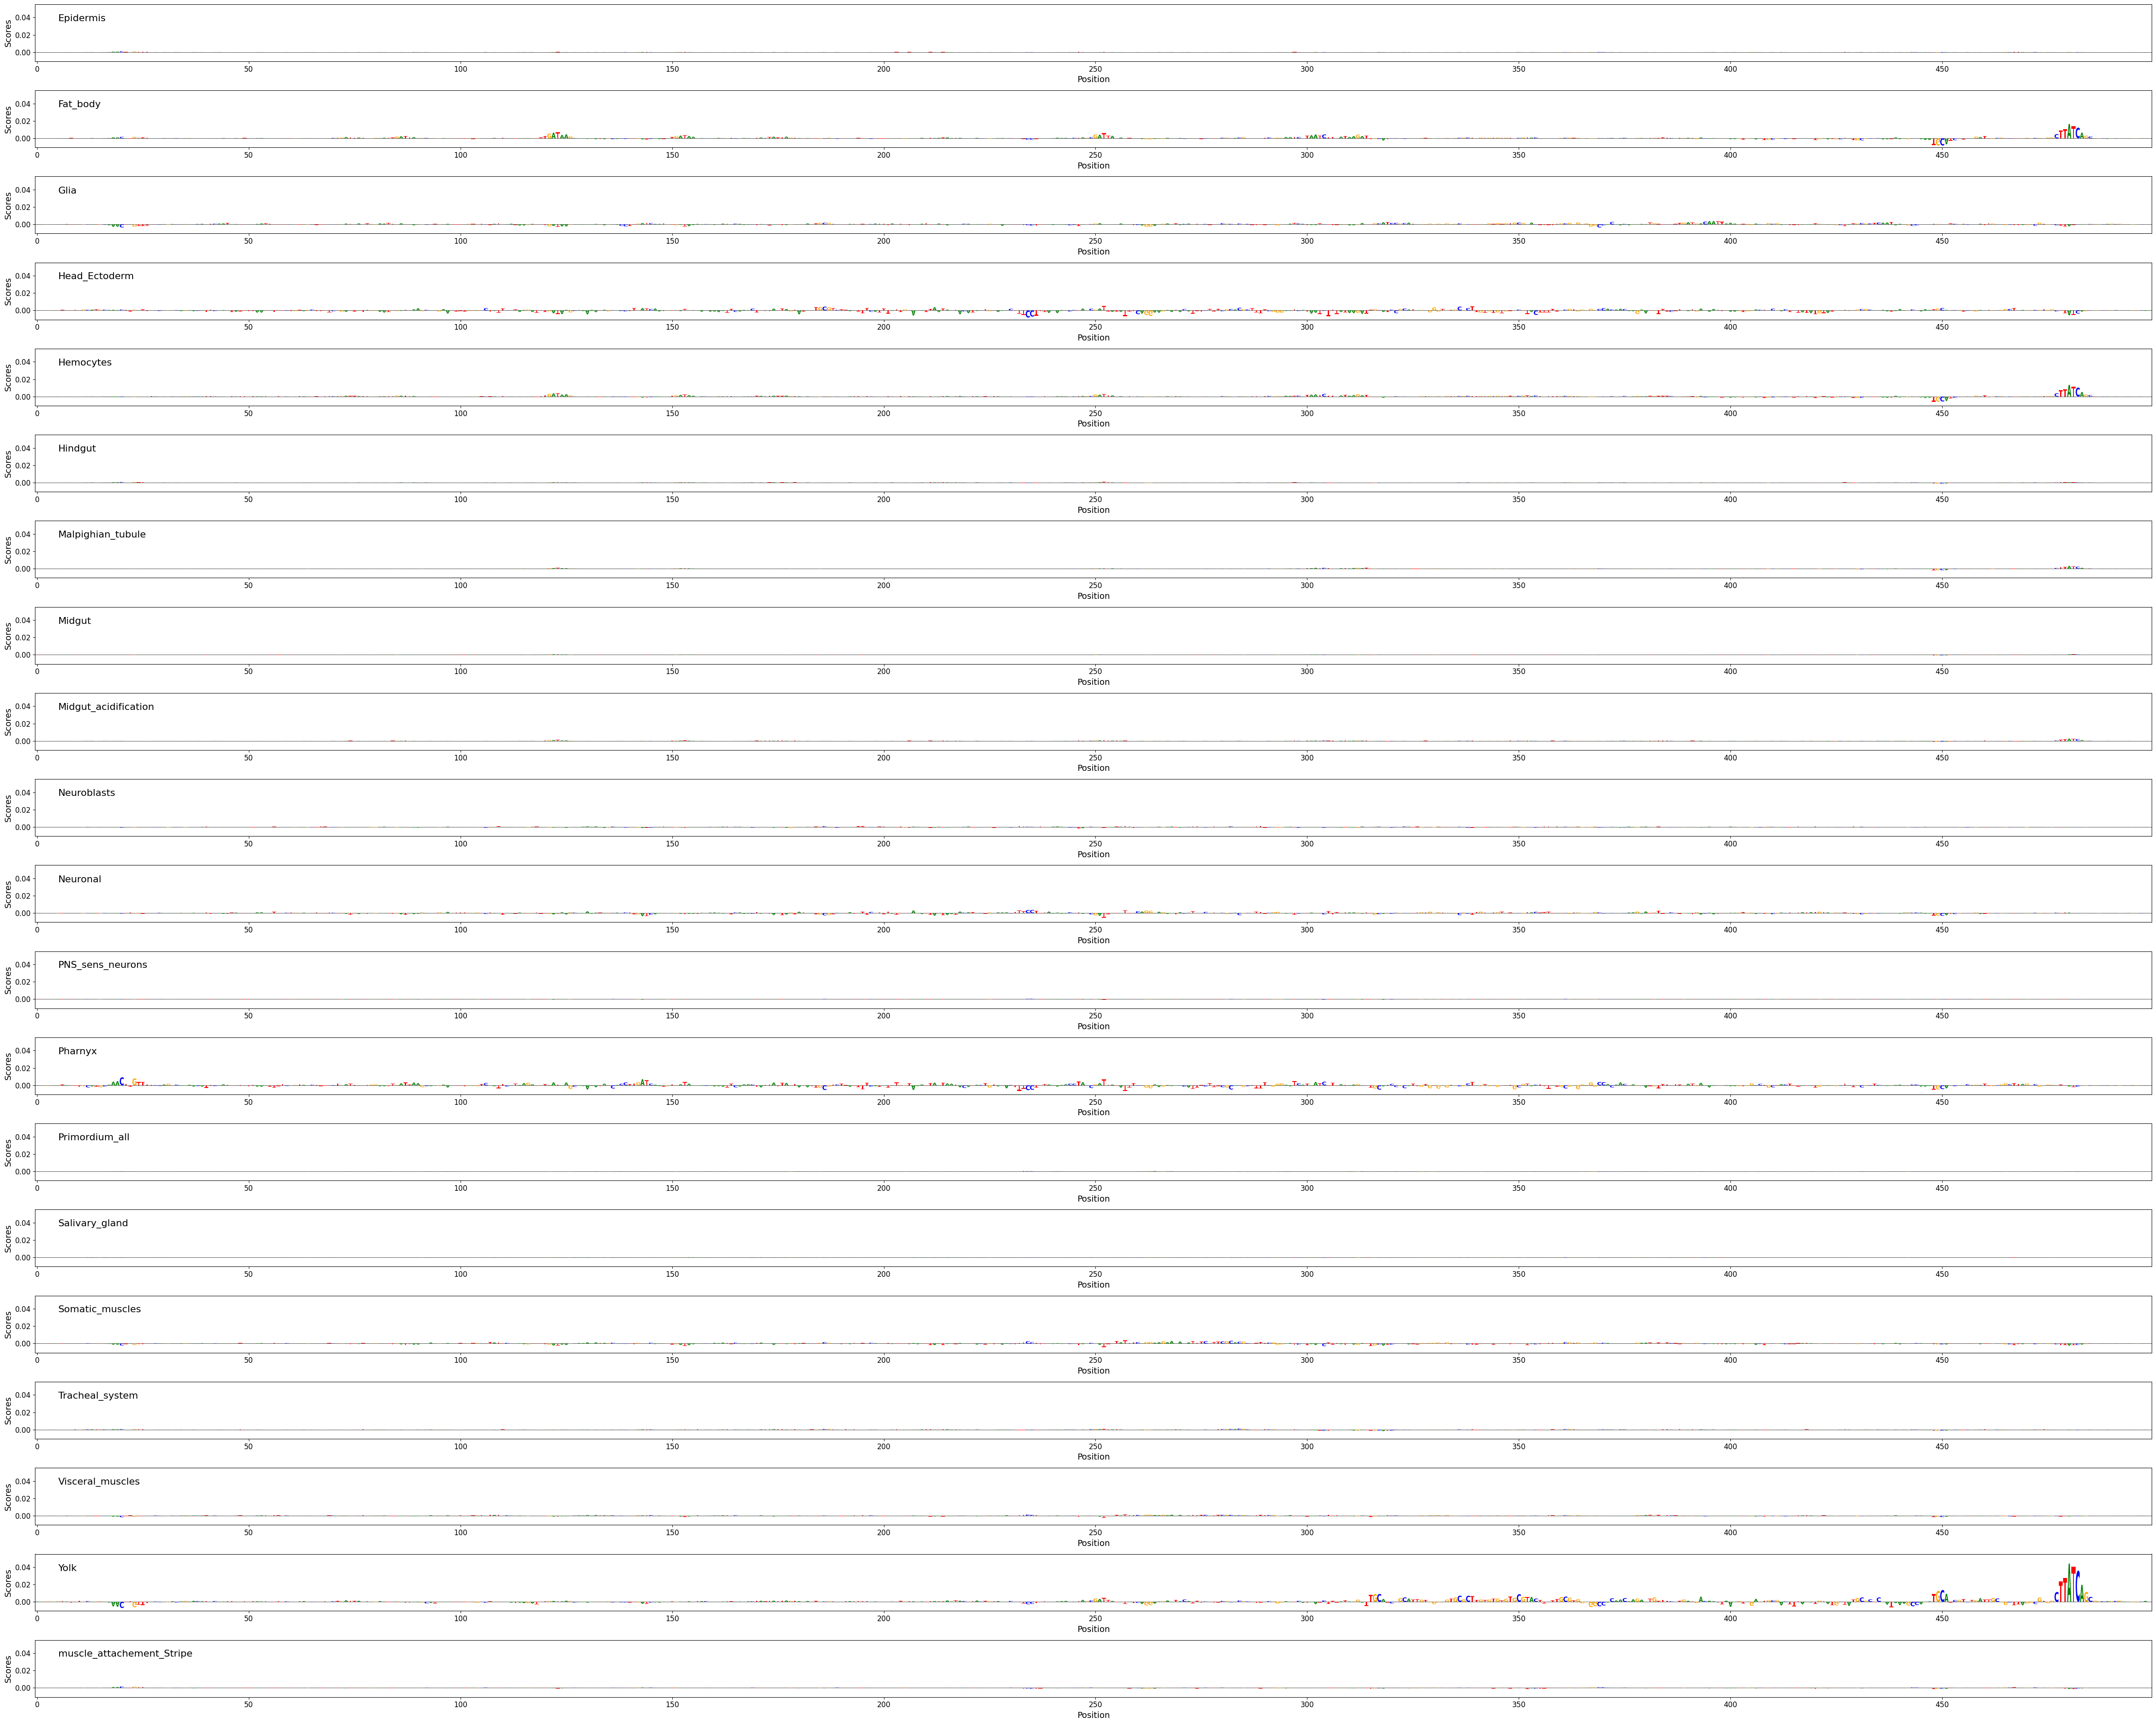

In [27]:
region_of_interest = "2L:8422620-8423120"
classes_of_interest = None

contribs, one_hots = crested.tl.contribution_scores(
    input=region_of_interest,
    model=models_hydrop,
    target_idx=None,
    method="integrated_grad",
)
crested.pl.patterns.contribution_scores(
    contribs,
    one_hots,
    class_labels=list(adata_hydrop.obs_names),
)